# Exercises in linear regression

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [22]:
df = pd.read_csv("EnergyEfficiency.csv")
df

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.

In [23]:
# sns.regplot(data = df, x = "SurfaceArea", y = "HeatingLoad")
# plt.title("Visualization of the correlation between surfacearea and heating load")
# plt.savefig('corrplot.png')
# plt.show()

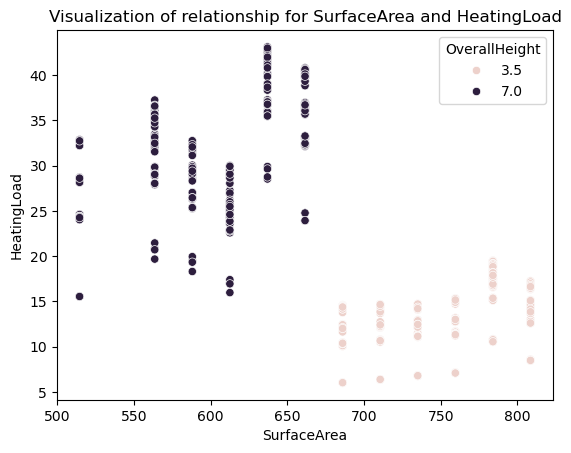

In [24]:
sns.scatterplot(data = df, x = "SurfaceArea", y = "HeatingLoad", hue="OverallHeight")
plt.title("Visualization of relationship for SurfaceArea and HeatingLoad")
plt.savefig('corrplot_w_regline.png')
plt.show()

2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?

In [25]:
stats.pearsonr(df["SurfaceArea"], df["HeatingLoad"])

PearsonRResult(statistic=np.float64(-0.6581202267776216), pvalue=np.float64(1.6869072902148853e-96))

##### We here have a negative correlation of -0,658..., It is big negative correlation It is statistically significant, as we have a p-value close to 0. It is strong

3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?

When adding OverallHeight as hue, it becomes clear that 2 clusters are present, corresponding to different OverallHeight (3.5 and 7.0). The negative correlation indicates, that if we decrease surface area, heating load increases. 

4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).

In [26]:
X = df["SurfaceArea"]
X

0      514.5
1      514.5
2      514.5
3      514.5
4      563.5
       ...  
763    784.0
764    808.5
765    808.5
766    808.5
767    808.5
Name: SurfaceArea, Length: 768, dtype: float64

In [27]:
X = sm.add_constant(X)

In [28]:
X

,const,SurfaceArea
0,1.0,514.5
1,1.0,514.5
2,1.0,514.5
3,1.0,514.5
4,1.0,563.5
...,...,...
763,1.0,784.0
764,1.0,808.5
765,1.0,808.5
766,1.0,808.5


In [29]:
y = df["HeatingLoad"]

Now we fit the model:

In [30]:
linreg_model = sm.OLS(y, X).fit()

In [31]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.69e-96
Time:                        13:13:06   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?

When surface area increases by 1, heatingload decreases by -0.0754. In other words, the slope (coefficient of x) is negative: -0.0754. 

6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.

In [32]:
linreg_model.params

const          72.945382
SurfaceArea    -0.075387
dtype: float64

We start by manually calculating the prediction for each datapoint, essentially  (predicted)y​=a+b*x: const + SurfaceArea*SurfaceArea

In [33]:
pred_y = linreg_model.params["const"] + linreg_model.params["SurfaceArea"]*df["SurfaceArea"]
pred_y

0      34.158690
1      34.158690
2      34.158690
3      34.158690
4      30.464719
         ...    
763    13.841851
764    11.994866
765    11.994866
766    11.994866
767    11.994866
Name: SurfaceArea, Length: 768, dtype: float64

*We could also just have used the build-in linreg_model.predict() method, but for learning purposes we stick to the above*

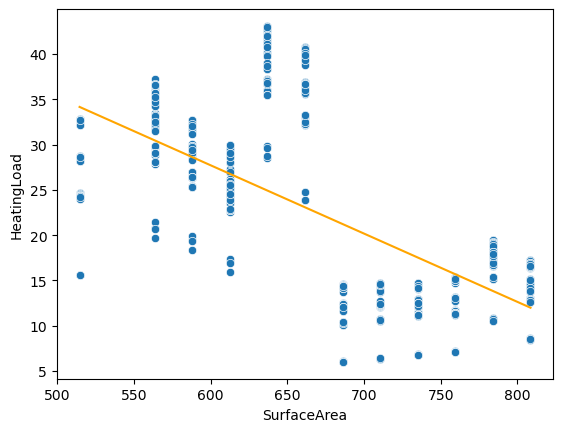

In [34]:
sns.scatterplot(data = df, x = "SurfaceArea", y = "HeatingLoad")
plt.plot(df["SurfaceArea"], pred_y, color = "orange")
plt.show()

7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [35]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.69e-96
Time:                        13:13:06   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Squared: sum((ŷi - y i)^2) / sum((y i – mean(y i))^2)

Our model has an R-Squared value of 0.433, indicating that 43.3% of the variance in HeatingLoad can be explained by the variance in SurfaceArea 

In [36]:
linreg_model.rsquared

np.float64(0.433122232893828)

Looking at the coefficient SurfaceArea we can see, that for each unit 1 unit increase, the heating load decreases by 0.00754. With a P-value of 0 (presumelly basically 0), it gives a good indication that the relationship between SurfaceArea and HeadingLoad is of statistical significanse

The following is the residuals for the model:

In [37]:
linreg_model.resid

0     -18.608690
1     -18.608690
2     -18.608690
3     -18.608690
4      -9.624719
         ...    
763     4.038149
764     4.545134
765     4.445134
766     4.485134
767     4.645134
Length: 768, dtype: float64

We calculate the RMSE (Root Mean Squared Error):

In [38]:
np.sqrt(np.mean(linreg_model.resid**2))

np.float64(7.592090475900788)

As seen by the RMSE value above, the model predicts with an average error of 7.59. In other words, when the model predicts the HeatingLoad, it is by average off by 7.59

### It can be argued that the model is moderately good at predicting. The relationship between the independent SurfaceArea and the dependent HeatingLoad is strong (as denoted by the p-value). However, there is quite a difference in variation in heatingload, as indicated by the R-Squared val, that is not explained by the SurfaceArea. Thus it would be fair to argue that other independent variables should be considered instead!  
### The RMSE value is also showing the models struggle to predict the correct values, as this difference is quite big compared to the ranges of values in HeatingLoad

### To conclude: By inspecting the scatterplot of the variables, it is no surprise that the model is struggling; there seems to not be the strongest linear relationship..

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.

In [39]:
df.head()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Adding predictor(independent) variables:

In [40]:
X_df = df[["CoolingLoad", "RoofArea", "WallArea"]]
X_df

,CoolingLoad,RoofArea,WallArea
0,21.33,110.25,294.0
1,21.33,110.25,294.0
2,21.33,110.25,294.0
3,21.33,110.25,294.0
4,28.28,122.50,318.5
...,...,...,...
763,21.40,220.50,343.0
764,16.88,220.50,367.5
765,17.11,220.50,367.5
766,16.61,220.50,367.5


Adding response (dependent) variables:

In [41]:
y_df = df["HeatingLoad"]

Adding intercept:

In [42]:
X_df = sm.add_constant(X_df)

In [43]:
X_df

,const,CoolingLoad,RoofArea,WallArea
0,1.0,21.33,110.25,294.0
1,1.0,21.33,110.25,294.0
2,1.0,21.33,110.25,294.0
3,1.0,21.33,110.25,294.0
4,1.0,28.28,122.50,318.5
...,...,...,...,...
763,1.0,21.40,220.50,343.0
764,1.0,16.88,220.50,367.5
765,1.0,17.11,220.50,367.5
766,1.0,16.61,220.50,367.5


We now fit the model:

In [44]:
mulinreg_model = sm.OLS(y, X_df).fit()

In [45]:
pred_y = mulinreg_model.predict()

In [46]:
mulinreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     5588.
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:13:06   Log-Likelihood:                -1661.4
No. Observations:                 768   AIC:                             3331.
Df Residuals:                     764   BIC:                             3349.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7662      1.020     -0.751      0.453      -2.768       1.235
CoolingLoad     0.9223      0.017     54.310      0.000       0.889       0.956
RoofArea       -0.0213      0.003     -6.294      0.000      -0.028      -0.015
WallArea        0.0130      0.002      6.658      0.000       0.009       0.017
==============================================================================
Omnibus:                       33.222   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.274
Skew:                          -0.048   Prob(JB):                     2.05e-21
Kurtosis:                       4.723   Cond. No.                     4.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?

Our model has an adjusted R-Squared value of 0.956, indicating that 95,6% of the variance in HeatingLoad can be explained by our model

In [47]:
mulinreg_model.rsquared_adj

np.float64(0.9562425983733003)

Looing at the coefficients we can see, that they all hold statistical significence, with a p-value of 0 (with the exception of the Intercept, "const", with a p-value of 0.453) 

As one would expect, when the CoolingLoad is increased by 1 unit, then HeatingLoad is increased by 0.922. In other words there is here a positive relationship
Notice how this change in value for HeatingLoad, is way less when it comes to RoofArea and WallArea. This indicates, as one would expect, that CoolingLoad have the biggest impact on HeatingLoad


The following is the residuals for the model:
linreg_model.resid

In [48]:
mulinreg_model.resid

0     -4.845356
1     -4.845356
2     -4.845356
3     -4.845356
4     -6.024306
         ...   
763   -0.872299
764    1.636956
765    1.324824
766    1.825982
767    2.520925
Length: 768, dtype: float64

We calculate the RMSE (Root Mean Squared Error):

In [49]:
np.sqrt(np.mean(mulinreg_model.resid**2))

np.float64(2.105190602572185)

As seen by the RMSE value above, the model predicts with an average error of 2.11. In other words, when the model predicts the HeatingLoad, it is by average off by 2.11

#### We have showcased that this model is better at predicting, compared to the simple linear model. However, can the data be trusted? Lets test:

## 3. Check each of the assumptions/problems for linear regression.

### Non-linearity of the data:

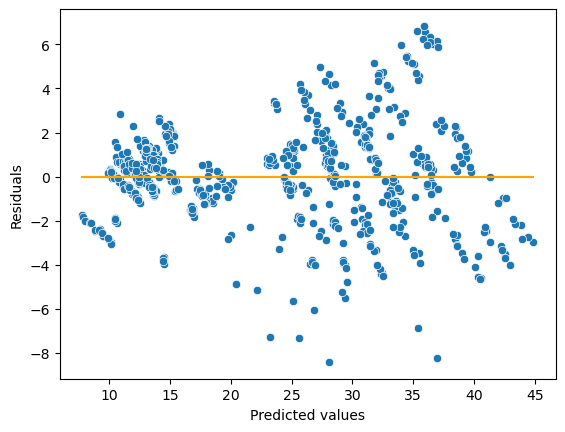

In [50]:
sns.scatterplot(x = pred_y, y = mulinreg_model.resid)
plt.plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

As seen above, it can be debated whether there is a clear linear relationship between the independent X variables and the dependent Y variable(HeatingLoad).
It seems like the variance(spread) of the residuals increases a bit, when the predictes values increases. It could be an indication that the homoscedasticity assumption is violated. If that's the case, then it could potentially affect the calculation of the p-values.

In other words, the figure above seem to suggest that the linearity of the relationship is questionable, and could potentially affect the model



### Correlation of error terms 

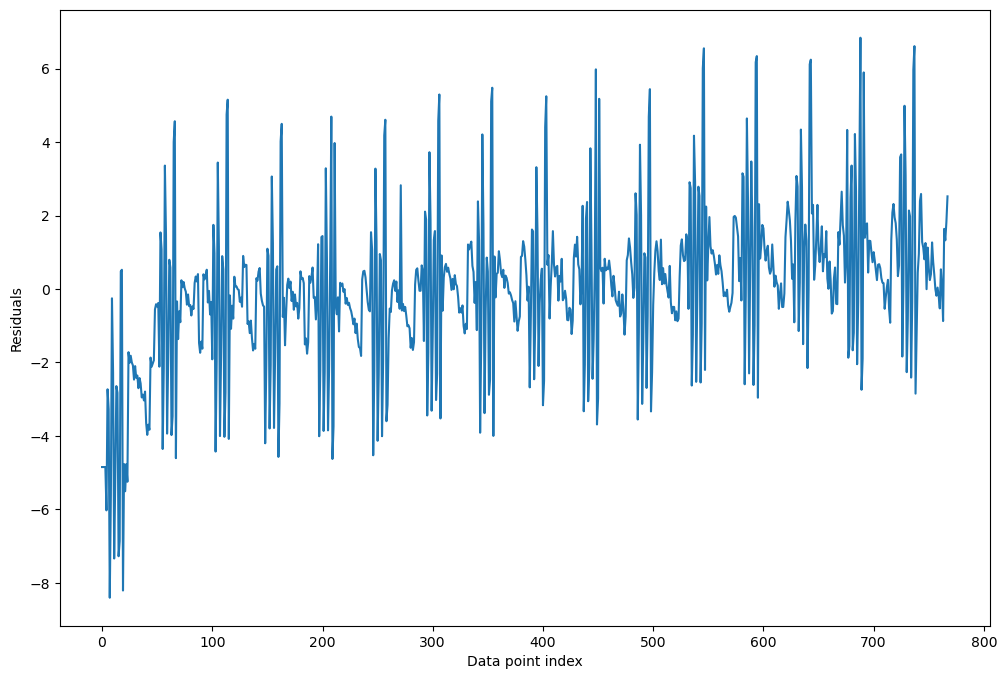

In [51]:
plt.rc("figure", figsize=(12, 8))
sns.lineplot(x = range(0,len(mulinreg_model.resid)), y = mulinreg_model.resid)
plt.ylabel("Residuals")
plt.xlabel("Data point index")
plt.show()

The figure above gives a clear indication, that the assumption of uncorrelated errors is violated. This is due to a quite noticable pattern of how the residuals are spread

### Non-constant variance of error terms

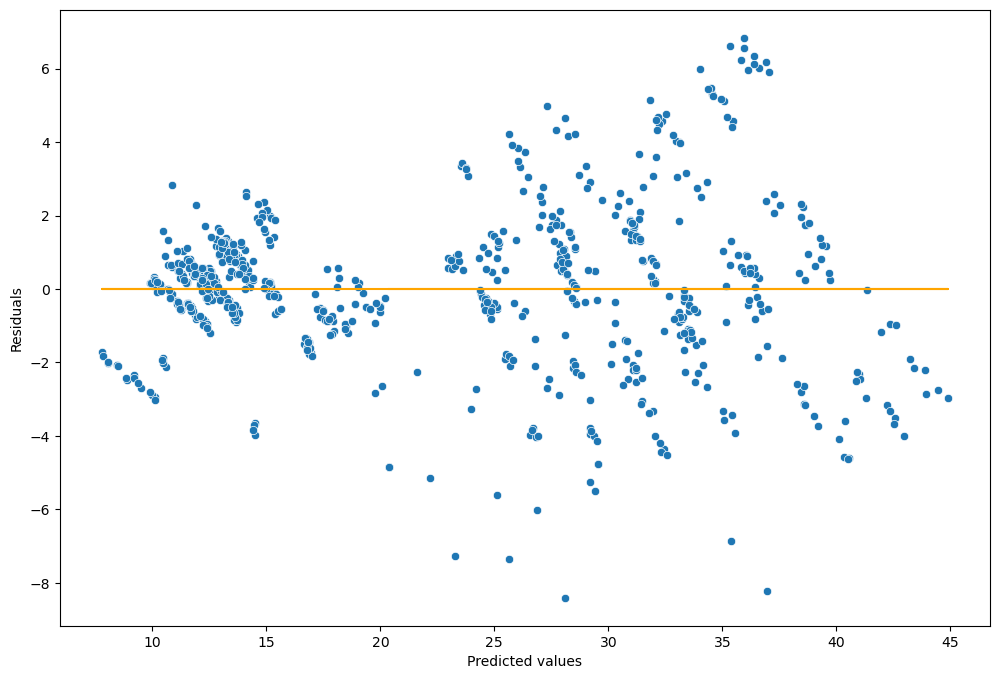

In [52]:
sns.scatterplot(x = pred_y, y = mulinreg_model.resid)
plt.plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

The above figure shows how the assumption of constant variance of error terms. It shows that when the predicted values increases, the variance likewise increases 

### Outliers

If we look at the figure above, it is a bit unclear whether there are outliers present. It could however be argued, that the dot between x 25-30, y -8 could be regarded as an outlier. It is thus not completely clear whether this assumtumption is violated

### High leverage points

In [53]:
leverageStats = mulinreg_model.get_influence().hat_matrix_diag
leverageStats

array([0.01733005, 0.01733005, 0.01733005, 0.01733005, 0.00530597,
       0.00791545, 0.00815785, 0.00447882, 0.00277954, 0.00551246,
       0.00435819, 0.00270499, 0.00412803, 0.00622232, 0.006545  ,
       0.00333693, 0.00531185, 0.00208309, 0.00206282, 0.00707092,
       0.01252366, 0.01263949, 0.01252366, 0.01294143, 0.00597819,
       0.00586486, 0.00596191, 0.00587233, 0.00447972, 0.00427053,
       0.00446987, 0.00429247, 0.00387833, 0.00370924, 0.00388399,
       0.00377322, 0.00409692, 0.0042029 , 0.00409692, 0.00426052,
       0.003675  , 0.00367148, 0.00368039, 0.00369533, 0.00862412,
       0.00848761, 0.00861493, 0.00865177, 0.01005031, 0.01015932,
       0.01008288, 0.01024745, 0.00339563, 0.00433742, 0.00448967,
       0.00336734, 0.00301182, 0.00325172, 0.00282954, 0.00330707,
       0.00225922, 0.0033491 , 0.00353777, 0.00199394, 0.00994799,
       0.00345132, 0.00298741, 0.01248277, 0.00933376, 0.0092328 ,
       0.00919869, 0.00943989, 0.00535635, 0.00533846, 0.00535

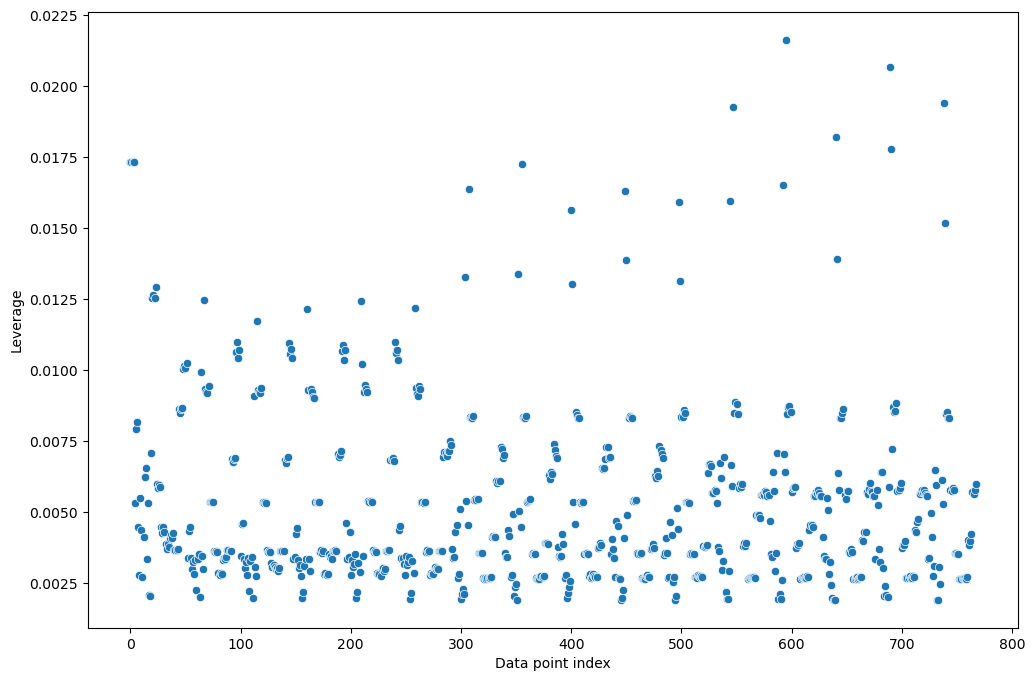

In [54]:
sns.scatterplot(x = range(0, len(leverageStats)), y = leverageStats)
plt.ylabel("Leverage")
plt.xlabel("Data point index")
plt.show()

As seen in the above figure, the assumption of no leverage-points is violated. There are quite a few points with a higher-leverage than the other datapoints. 

### Collinearity

In [55]:
X_df.corr()

,const,CoolingLoad,RoofArea,WallArea
const,NaN,NaN,NaN,NaN
CoolingLoad,NaN,1.000000,-0.862547,0.427117
RoofArea,NaN,-0.862547,1.000000,-0.292316
WallArea,NaN,0.427117,-0.292316,1.000000


The assumption of no strong correlation between predictor variables is violated. 
This is especially the case for CoolingLoad and RoofArea, with a negative correlation of 0.863 Looking at CoolingLoad and WallArea, a somewhat moderate correlation is also present. 
It would here make sense to consider dropping CoolingLoad or RoofArea

## Exercise 3

In this exercise, we will use the Ames dataset from the multiple linear regression notebook.

Answer the following questions:
1. Can you train a linear regression model to achieve a lower RMSE than the models we saw in the multiple linear regression notebook?
2. Can you train a linear regression model to achieve a higher R-squared than the final model in the multiple linear regression notebook?
3. Do your models satisfy the assumptions of linear regression?